# M1/M2剪刀差与股市的关系

M1低于M2 5%以上，股市期望未来有较高的收益，反之M1高于M2 5%以上，股市承压。

2014年之后较为紊乱，可能主要是理财的大规模发展使得M1和M2的代表性减弱。

但2017年表外融资受到严监管之后，未来这个关系可能会继续成立

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from WindPy import w
%matplotlib inline

In [68]:
w.start()

.ErrorCode=0
.Data=[Already conntected!]

In [122]:
data = w.edb('M0001383,M0001385', '2002-01-01', '2019-03-07')

In [123]:
df = pd.DataFrame(np.array(data.Data).T, columns=['M1', 'M2'], index=data.Times)

In [124]:
df['diff'] = df['M1'] - df['M2']

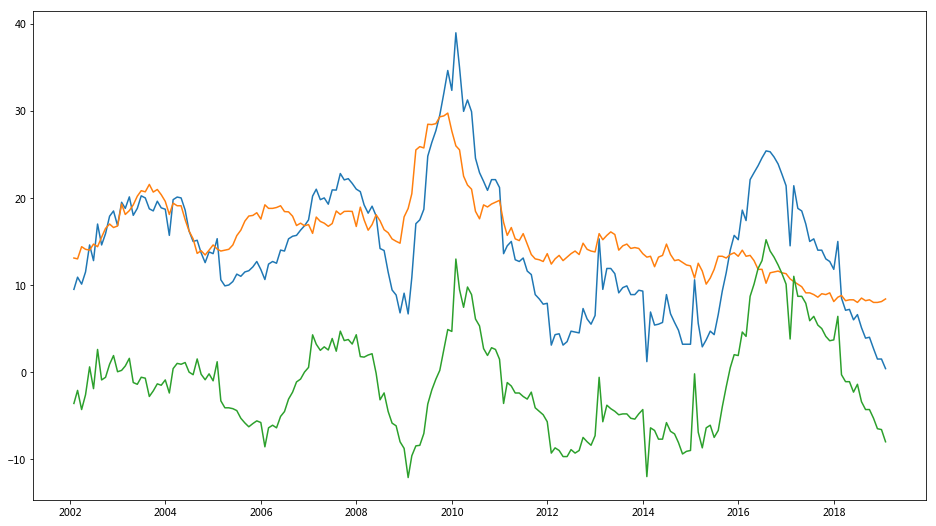

In [125]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(df['M1'])
ax.plot(df['M2'])
ax.plot(df['diff'])

In [126]:
data = w.wsd('881001.WI', 'close', '2002-01-01', '2019-03-07', 'Period=M;Days=Alldays')

In [127]:
pdf = pd.DataFrame(np.array(data.Data).T, index=data.Times, columns=['881001.WI'])

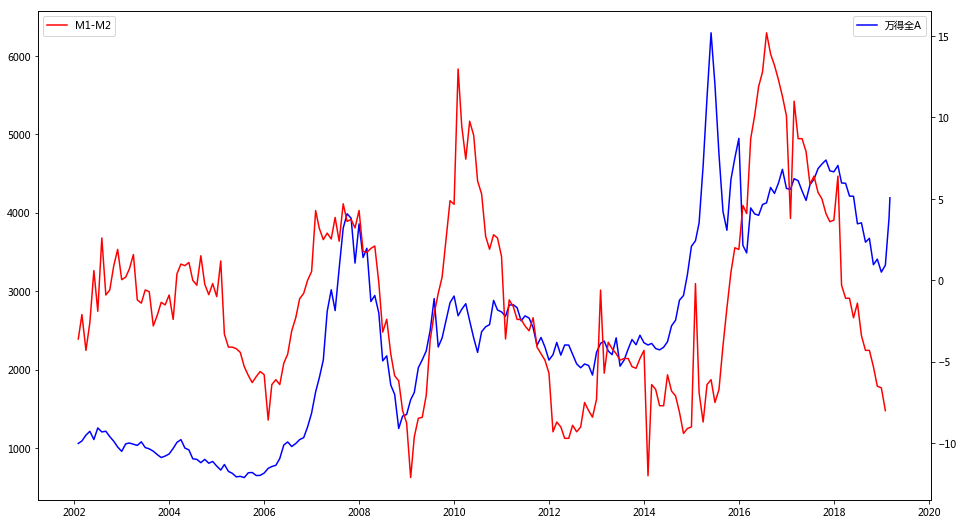

In [128]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(pdf['881001.WI'], color='blue', label=u'万得全A')
ax.legend()
ax2 = ax.twinx()
ax2.plot(df['diff'], color='red', label=u'M1-M2')
ax2.legend(loc='upper left')

In [129]:
df = df.merge(pdf, left_index=True, right_index=True)

In [130]:
df.index = pd.to_datetime(df.index)

In [131]:
df['return'] = df['881001.WI'].pct_change(6).shift(-6)

In [132]:
df = df.dropna()

In [145]:
# x, y = df[df.index <= '2013-01-01']['diff'], df[df.index <= '2013-01-01']['return']
x, y = df['diff'], df['return']

In [146]:
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [147]:
fx = np.linspace(x.min(), x.max(), 500)
fy = gradient * fx + intercept

Text(0,0.5,u'\u672a\u67656\u4e2a\u6708\u4e07\u5f97\u5168A\u6536\u76ca\u7387')

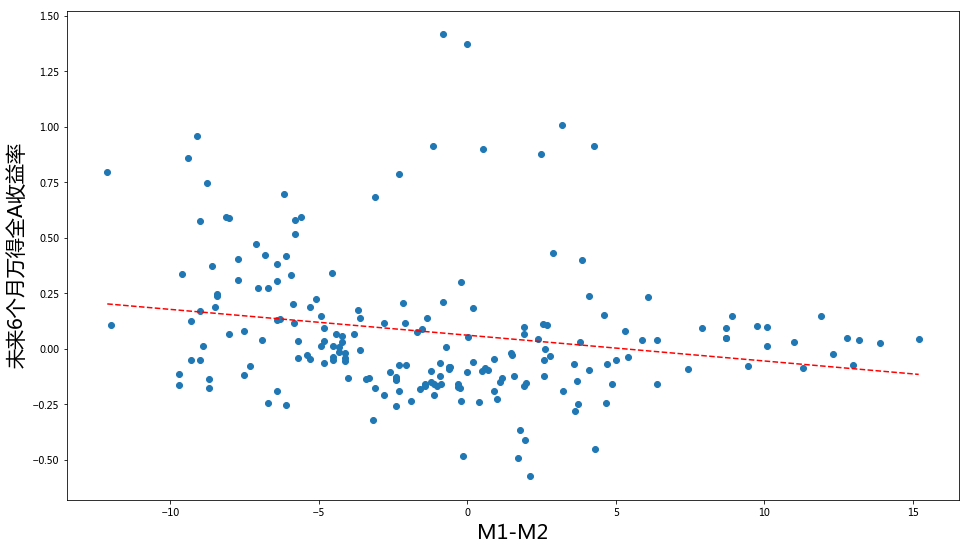

In [150]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.scatter(x, y)
ax.plot(fx, fy, color='red', linestyle='--')
ax.set_xlabel(u'M1-M2', fontsize=20)
ax.set_ylabel(u'未来6个月万得全A收益率', fontsize=20)
# ax.scatter(df[df.index <= '2010-01-01']['diff'], df[df.index <= '2010-01-01']['return'])
# ax.scatter(df[df.index >= '2010-01-01']['diff'], df[df.index >= '2010-01-01']['return'])